<a href="https://colab.research.google.com/github/ElenaNtm/Energy-price-predictions/blob/main/Timeseries_Market_Results_Model_Creation_HENEX(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Load Data

In [ ]:
path = "/content/drive/MyDrive/Market_Res"
#df = pd.read_csv(path, parse_dates=["Trade Day"])
df = pd.read_csv(path,  parse_dates=["DELIVERY_MTU","DDAY"],
                 index_col=["DDAY"])

In [ ]:
df.head()

,Unnamed: 0,TARGET,SIDE_DESCR,ASSET_DESCR,CLASSIFICATION,DELIVERY_MTU,SORT,MCP,TOTAL_TRADES
DDAY,,,,,,,,,
2023-01-01,0,CRIDA1,Buy,GR-IT,Exports,2023-01-01 00:00:00,1,216.90,4.600
2023-01-01,1,CRIDA1,Buy,GR-IT,Exports,2023-01-01 19:00:00,20,264.42,1.600
2023-01-01,2,CRIDA1,Buy,GR-IT,Exports,2023-01-01 20:00:00,21,247.00,0.700
2023-01-01,3,CRIDA1,Buy,LOAD,LV,2023-01-01 00:00:00,1,216.90,23.745
2023-01-01,4,CRIDA1,Buy,LOAD,LV,2023-01-01 01:00:00,2,264.94,27.327


In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
#We will drop the DDAY column, as it partially has the same info as the DELIVERY_MTU
#df.drop('DDAY', axis = 1, inplace = True)

In [ ]:
df.drop('DELIVERY_MTU', axis = 1, inplace = True)

In [ ]:
df.head()

,TARGET,SIDE_DESCR,ASSET_DESCR,CLASSIFICATION,SORT,MCP,TOTAL_TRADES
DDAY,,,,,,,
2023-01-01,CRIDA1,Buy,GR-IT,Exports,1,216.90,4.600
2023-01-01,CRIDA1,Buy,GR-IT,Exports,20,264.42,1.600
2023-01-01,CRIDA1,Buy,GR-IT,Exports,21,247.00,0.700
2023-01-01,CRIDA1,Buy,LOAD,LV,1,216.90,23.745
2023-01-01,CRIDA1,Buy,LOAD,LV,2,264.94,27.327


#Encode the categorical data with label encoder

In [ ]:
#First we will split the numerical, datetime and categorical columns of the dataframe
# Initialize empty lists to store column names
numerical_cols = []
categorical_cols = []
#datetime_cols = []
#non_datetime_cols = []

In [ ]:
# Loop through DataFrame columns and categorize them based on data type
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        numerical_cols.append(column)
    #elif pd.api.types.is_datetime64_any_dtype(df[column]):
        #datetime_cols.append(column)
    else:
        categorical_cols.append(column)


In [ ]:
#non_datetime_cols.extend(numerical_cols)
#non_datetime_cols.extend(categorical_cols)

In [ ]:
print('The numerical columns are: ', numerical_cols)
#print('The datetime columns are: ', datetime_cols)
print('The categorical columns that will be encoded are: ', categorical_cols)
#print('The non datetime columns that will be encoded in a later step are: ', non_datetime_cols)

The numerical columns are:  ['SORT', 'MCP', 'TOTAL_TRADES']
The categorical columns that will be encoded are:  ['TARGET', 'SIDE_DESCR', 'ASSET_DESCR', 'CLASSIFICATION']


In [ ]:
#Define the LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
#Encode the categorical columns
for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,TARGET,SIDE_DESCR,ASSET_DESCR,CLASSIFICATION,SORT,MCP,TOTAL_TRADES
DDAY,,,,,,,
2023-01-01,0,0,4,4,1,216.90,4.600
2023-01-01,0,0,4,4,20,264.42,1.600
2023-01-01,0,0,4,4,21,247.00,0.700
2023-01-01,0,0,8,8,1,216.90,23.745
2023-01-01,0,0,8,8,2,264.94,27.327


For Decoding the data use the method: label_encoder.inverse_transform(encoded_column)

#Now that we have all the data encoded we will Scale them for further use. We will use the MinMaxScaler as we do not have normal distribution in our data-Not to run here

In [ ]:
#Define the Scaler
scaler = MinMaxScaler()

In [ ]:
columns = df.columns
print(columns)

Index(['TARGET', 'SIDE_DESCR', 'ASSET_DESCR', 'CLASSIFICATION', 'SORT', 'MCP',
       'TOTAL_TRADES'],
      dtype='object')


In [ ]:
df[columns] = scaler.fit_transform(df[columns])

##First you will need to descale the data to get the true results for the model

In [ ]:
#df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])
#df[categorical_cols] = scaler.inverse_transform(df[categorical_cols])

In [ ]:
df.head()

,TARGET,SIDE_DESCR,ASSET_DESCR,CLASSIFICATION,SORT,MCP,TOTAL_TRADES
DDAY,,,,,,,
2023-01-01,0.0,0.0,0.363636,0.307692,0.000000,0.100953,0.000767
2023-01-01,0.0,0.0,0.363636,0.307692,0.826087,0.116571,0.000267
2023-01-01,0.0,0.0,0.363636,0.307692,0.869565,0.110846,0.000117
2023-01-01,0.0,0.0,0.727273,0.615385,0.000000,0.100953,0.003960
2023-01-01,0.0,0.0,0.727273,0.615385,0.043478,0.116742,0.004558


#Corelation Matrix

In [ ]:
# prints data that will be plotted columns shown here are selected by corr() since they are ideal for the plot
print(df.corr())

                  TARGET  SIDE_DESCR  ASSET_DESCR  CLASSIFICATION      SORT  \
TARGET          1.000000    0.097956    -0.129744       -0.438500  0.011788   
SIDE_DESCR      0.097956    1.000000     0.196798        0.080104  0.000322   
ASSET_DESCR    -0.129744    0.196798     1.000000        0.299290  0.016505   
CLASSIFICATION -0.438500    0.080104     0.299290        1.000000  0.034682   
SORT            0.011788    0.000322     0.016505        0.034682  1.000000   
MCP             0.058534    0.068987    -0.013905       -0.059519  0.154524   
TOTAL_TRADES    0.401231   -0.034544     0.051796        0.124976  0.008409   

                     MCP  TOTAL_TRADES  
TARGET          0.058534      0.401231  
SIDE_DESCR      0.068987     -0.034544  
ASSET_DESCR    -0.013905      0.051796  
CLASSIFICATION -0.059519      0.124976  
SORT            0.154524      0.008409  
MCP             1.000000      0.059650  
TOTAL_TRADES    0.059650      1.000000  


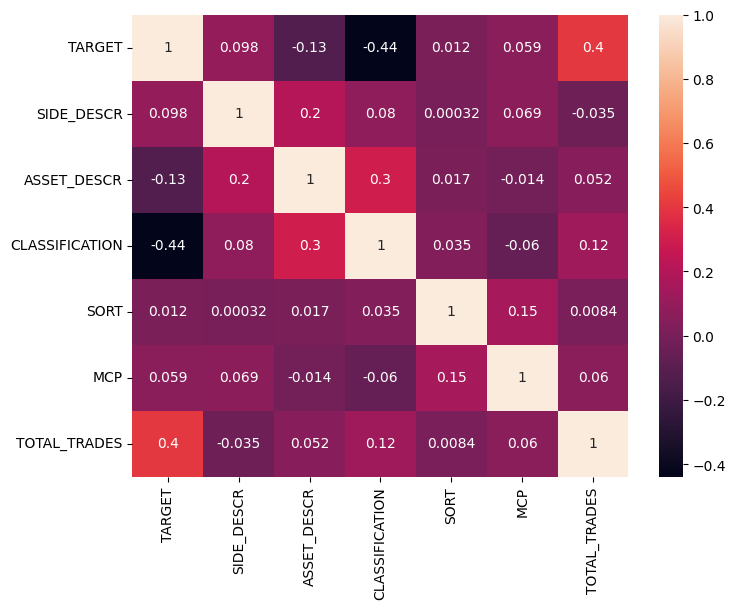

<Figure size 2500x2500 with 0 Axes>

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), annot=True)

# displaying heatmap
plt.figure(figsize=(25,25))
plt.show()

We do not have really strong relation between the data, except the TOTAL_TRADES and the TARGET column

#Create New dataframe with only the MCP column

In [ ]:
prices = pd.DataFrame(df["MCP"]).rename(columns={"MCP": "Price"})

In [ ]:
prices.head()

,Price
DDAY,
2023-01-01,0.100953
2023-01-01,0.116571
2023-01-01,0.110846
2023-01-01,0.100953
2023-01-01,0.116742


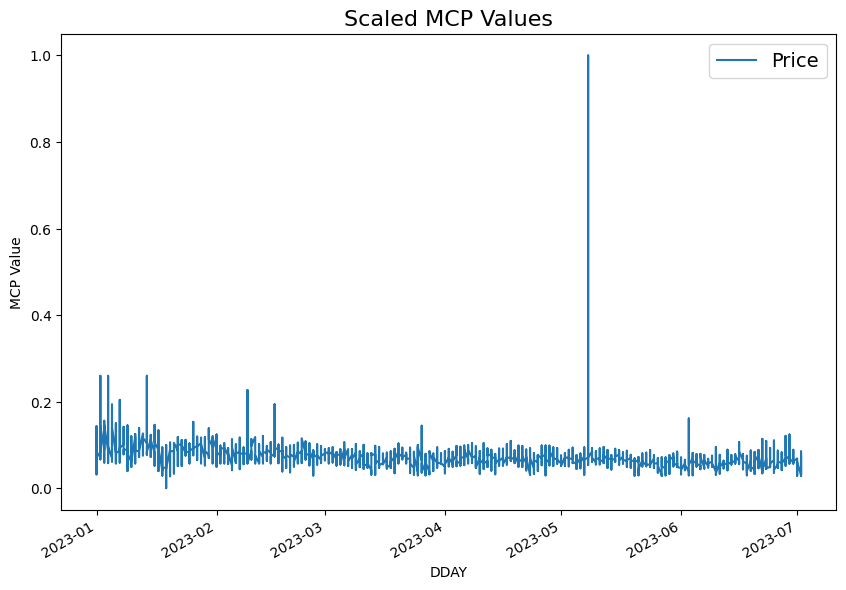

In [ ]:
prices['Price'].plot(figsize=(10, 7))
plt.ylabel("MCP Value")
plt.title("Scaled MCP Values", fontsize=16)
plt.legend(fontsize=14);

#Find Rolling Average for capturing trends and patterns in the data

In [ ]:
# Define the window size for the rolling average
window_size = 7

# Calculate the rolling average using the rolling() function
rolling_average = prices['Price'].rolling(window=window_size).mean()

# The 'rolling_average' Series will now contain the moving average values
print(rolling_average)

DDAY
2023-01-01         NaN
2023-01-01         NaN
2023-01-01         NaN
2023-01-01         NaN
2023-01-01         NaN
                ...   
2023-07-02    0.045674
2023-07-02    0.050874
2023-07-02    0.056154
2023-07-02    0.060972
2023-07-02    0.064444
Name: Price, Length: 133457, dtype: float64


In [ ]:
rolling_average = prices['Price'].rolling(window=window_size, center=True).mean()
print(rolling_average)

DDAY
2023-01-01         NaN
2023-01-01         NaN
2023-01-01         NaN
2023-01-01    0.105852
2023-01-01    0.106510
                ...   
2023-07-02    0.060972
2023-07-02    0.064444
2023-07-02         NaN
2023-07-02         NaN
2023-07-02         NaN
Name: Price, Length: 133457, dtype: float64


#VAR (Vector Autoregression) and VECM (Vector Error Correction Model)

In [ ]:
!pip install pandas numpy statsmodels

In [ ]:
from statsmodels.tsa.api import VAR, VECM

##VAR Model

In [ ]:
# Fit the VAR model
model = VAR(df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#Choose the order of the VAR model (p)
#“n” - no deterministic terms
order = model.select_order(maxlags=7, trend='n')

# Fit the VAR model with the selected order
results = model.fit(maxlags=order.aic)

In [ ]:
#Print the summary of the VAR model
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 03, Jul, 2023
Time:                     18:28:25
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -48.2227
Nobs:                     133450.    HQIC:                  -48.2407
Log likelihood:       1.89422e+06    FPE:                1.11167e-21
AIC:                     -48.2484    Det(Omega_mle):     1.10876e-21
--------------------------------------------------------------------
Results for equation TARGET
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.000044         0.000032           -1.403           0.160
L1.TARGET                 0.999938         0.002743          364.491           0.000
L1.SIDE_DESCR             0.000006         

In [ ]:
# Print the lag order of the VAR model
print("Lag Order:", results.k_ar)

Lag Order: 7


In [ ]:
#Perform Granger causality tests to determine causal relationships between variables
granger_test = results.test_causality('MCP', 'TARGET', kind='f')
print(granger_test.summary())

Granger causality F-test. H_0: TARGET does not Granger-cause MCP. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df    
-------------------------------------------------
         5.375          2.010   0.000 (7, 933800)
-------------------------------------------------


##VECM Model

In [ ]:
# Fit the VECM model
model_vecm = VECM(df, k_ar_diff=order.aic)  # Use the same order selected for VAR
results_vecm = model_vecm.fit()

NameError: ignored

In [ ]:
# Print the summary of the VECM model
print(results_vecm.summary())

#Train-Test Split for timeseries data by hand to ensure it will be chronologicaly accurate

In [ ]:
train = prices.loc[df.index < '2023-06-01']
test = prices.loc[df.index >= '2023-06-01']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2023-06-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

NameError: ignored

#Create windows and horizon

##N-BEATS Model

In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs